In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# DOWNLOAD DATASET AND BASIC REQUIREMNETS



# Importing header files and loading dataset 

In [65]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns',None)

In [66]:
# train_df = pd.read_csv("/kaggle/input/DontGetKicked/training.csv")
# test_df = pd.read_csv("/kaggle/input/DontGetKicked/test.csv")
# submissions_df = pd.read_csv("/kaggle/input/DontGetKicked/example_entry.csv")

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
submissions_df = pd.read_csv("sample_submission.csv")


train_df.head(5)

,IsBadBuy,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
0,1,8,DODGE,1500 RAM PICKUP 2WD,ST,REG CAB 3.7L ST,GREY,AUTO,1.0,Alloy,96094,AMERICAN,LARGE TRUCK,3558.0,4257.0,6863.0,7580.0,3496.0,4363.0,6833.0,7779.0,6420.0,0,920
1,0,9,NISSAN,SENTRA,GXE,4D SEDAN,BLUE,AUTO,2.0,Covers,85441,TOP LINE ASIAN,COMPACT,2026.0,2356.0,4635.0,5071.0,2223.0,2613.0,4626.0,4975.0,3950.0,0,894
2,0,4,CHEVROLET,TRAILBLAZER EXT 2WD,LS,4D SUV 4.2L LS,GREEN,AUTO,1.0,Alloy,70679,AMERICAN,MEDIUM SUV,8234.0,9556.0,9393.0,10820.0,8407.0,9652.0,9580.0,10924.0,8520.0,0,1155
3,0,5,CHRYSLER,PT CRUISER,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,59140,AMERICAN,MEDIUM,3431.0,4332.0,6951.0,7819.0,4154.0,5268.0,7510.0,8653.0,5870.0,0,1086
4,0,5,PONTIAC,GRAND PRIX,Bas,4D SEDAN,WHITE,AUTO,1.0,Alloy,71006,AMERICAN,LARGE,4864.0,6099.0,8291.0,9680.0,4089.0,5451.0,7696.0,8937.0,6595.0,0,1974


In [67]:
train_df.isnull().sum()

IsBadBuy                                0
VehicleAge                              0
Make                                    0
Model                                   0
Trim                                  838
SubModel                                1
Color                                   1
Transmission                            1
WheelTypeID                          1834
WheelType                            1836
VehOdo                                  0
Nationality                             1
Size                                    1
MMRAcquisitionAuctionAveragePrice       7
MMRAcquisitionAuctionCleanPrice         7
MMRAcquisitionRetailAveragePrice        7
MMRAcquisitonRetailCleanPrice           7
MMRCurrentAuctionAveragePrice         108
MMRCurrentAuctionCleanPrice           108
MMRCurrentRetailAveragePrice          108
MMRCurrentRetailCleanPrice            108
VehBCost                                0
IsOnlineSale                            0
WarrantyCost                      

In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25310 entries, 0 to 25309
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           25310 non-null  int64  
 1   VehicleAge                         25310 non-null  int64  
 2   Make                               25310 non-null  object 
 3   Model                              25310 non-null  object 
 4   Trim                               24472 non-null  object 
 5   SubModel                           25309 non-null  object 
 6   Color                              25309 non-null  object 
 7   Transmission                       25309 non-null  object 
 8   WheelTypeID                        23476 non-null  float64
 9   WheelType                          23474 non-null  object 
 10  VehOdo                             25310 non-null  int64  
 11  Nationality                        25309 non-null  obj

#EXPLORATORY DATA ANALYSIS

## IsBadBuy is the output of our classifer [target]

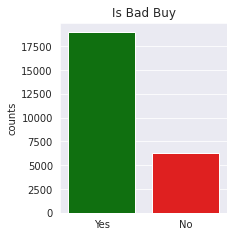

In [69]:
a=train_df.IsBadBuy.value_counts()
plt.figure(figsize=(3,3.5))
sns.barplot(x=['Yes','No'],y=a,palette=['g','r'])
plt.ylabel('counts')
plt.title("Is Bad Buy")
plt.show()

## Have a general picture of the data distribution 

### VehicleAge

#### Vehicle itself is a normal distribution


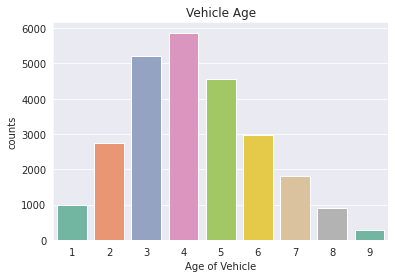

In [70]:
age=pd.DataFrame(train_df.VehicleAge.value_counts())
plt.figure(figsize=(6,4))
sns.barplot(x=age.index,y='VehicleAge',data=age,palette='Set2')
plt.ylabel('counts')
plt.xlabel('Age of Vehicle')
plt.title("Vehicle Age")
plt.show()


#### For Good Buy, the mean of distribution shift to left [younger], and vice versa.

Note: the age distribution for bad buy is so smooth, might already become "population distribution" instead of "smple distribution"

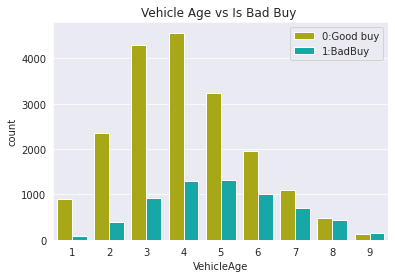

In [71]:
plt.title("Vehicle Age vs Is Bad Buy ")
sns.countplot(x = "VehicleAge", data =train_df, hue = "IsBadBuy",palette=['y','c'])
plt.legend(['0:Good buy','1:BadBuy'])
# good buy: gama distribution
# kafang distribution
plt.show()

### Make

For the brand which amount of transaction over 1000, all of them (**CHEVROLET, FORD, DODGE, CHRYSLER, PONTIAC**) have large probability to end up as a Bad Buy.

> All brands seems have large probability of leading a Bad Buy.

In [72]:
px.histogram(train_df, x = "Make", color = "IsBadBuy",height=500,width=800)

In [73]:
print(train_df.Make.value_counts().keys())

Index(['CHEVROLET', 'DODGE', 'FORD', 'CHRYSLER', 'PONTIAC', 'KIA', 'NISSAN',
       'SATURN', 'HYUNDAI', 'JEEP', 'SUZUKI', 'TOYOTA', 'MITSUBISHI', 'MAZDA',
       'MERCURY', 'BUICK', 'GMC', 'HONDA', 'OLDSMOBILE', 'ISUZU', 'SCION',
       'LINCOLN', 'VOLKSWAGEN', 'INFINITI', 'MINI', 'CADILLAC', 'LEXUS',
       'VOLVO', 'ACURA', 'SUBARU', 'TOYOTA SCION'],
      dtype='object')


#### Drop some Maker that only appears on a too low frequency.

In [74]:
threshold = 200 # Anything that occurs less than this will be removed.
value_counts = train_df.Make.value_counts() # Specific column 
to_remove = value_counts[value_counts <= threshold].index
train_df.Make.replace(to_remove, np.nan, inplace=True)

print(train_df.Make.value_counts().keys())
# px.histogram(train_df, x = "Make", color = "IsBadBuy",height=500,width=800)

Index(['CHEVROLET', 'DODGE', 'FORD', 'CHRYSLER', 'PONTIAC', 'KIA', 'NISSAN',
       'SATURN', 'HYUNDAI', 'JEEP', 'SUZUKI', 'TOYOTA', 'MITSUBISHI', 'MAZDA',
       'MERCURY', 'BUICK', 'GMC'],
      dtype='object')


In [75]:
px.histogram(train_df, x = "Make", color = "IsBadBuy",height=500,width=800)

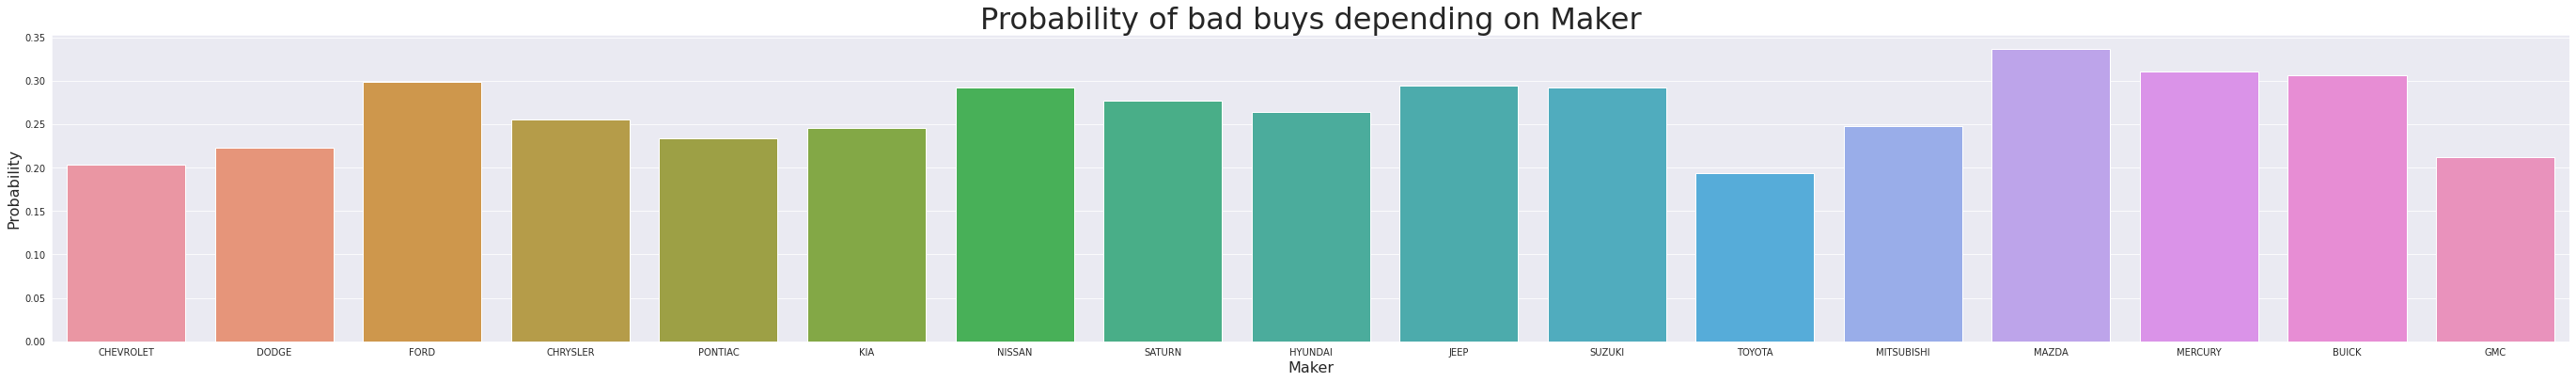

In [76]:
x_titles = train_df.Make.value_counts().keys()
y_titles = [None] * len(x_titles)
for idx in range(len(x_titles)):
  curr = train_df[(train_df.Make==x_titles[idx])].count()[1]
  curr_bad = train_df[(train_df.Make== x_titles[idx])&(train_df.IsBadBuy==1)].count()[1]
  y_titles[idx] = curr_bad/curr
  # print("{0:.0%}".format(y_titles[idx]))

plt.figure(figsize=(48,6))
plt.title("Probability of bad buys depending on Maker",fontsize=32)
plt.ylabel('Probability',fontsize=16)
plt.xlabel('Maker',fontsize=16)
sns.barplot(x=x_titles,y=y_titles)
plt.show()


### Nationality


In [77]:
px.histogram(train_df, x = "Nationality", color = "IsBadBuy",height=450,width=800)

## MMR-Acquisition and MMR-Current Price

### MMRAcquisitionAuctionAveragePrice & MMRAcquisitionRetailAveragePrice

It's obvious that we need to drop the data beyound 18K for MMRAcquisitionAuctionAveragePrice
> [Idea #1] always drop the data that fall ourside of 2.5%-97.2%  
> **[Idea #2] USE PCA TO NORMALIZE DATA!!!!!!!!!!!**


In [78]:
px.scatter(train_df, x = 'MMRAcquisitionAuctionAveragePrice', y = 'MMRAcquisitionRetailAveragePrice', color = 'IsBadBuy',height=500,width=1000)

### MMRAcquisitionAuctionAveragePrice & MMRCurrentAverageAveragePrice

It's obvious that we need to drop the data beyound 18K for MMRAcquisitionAuctionAveragePrice; as well as 0k.


In [79]:
px.scatter(train_df, x = 'MMRAcquisitionAuctionAveragePrice', y = 'MMRCurrentAuctionAveragePrice' ,color = 'IsBadBuy',height=500,width=1000)

### Correlation? 

Note: there are many missing data and some off data which will be definitely droped  


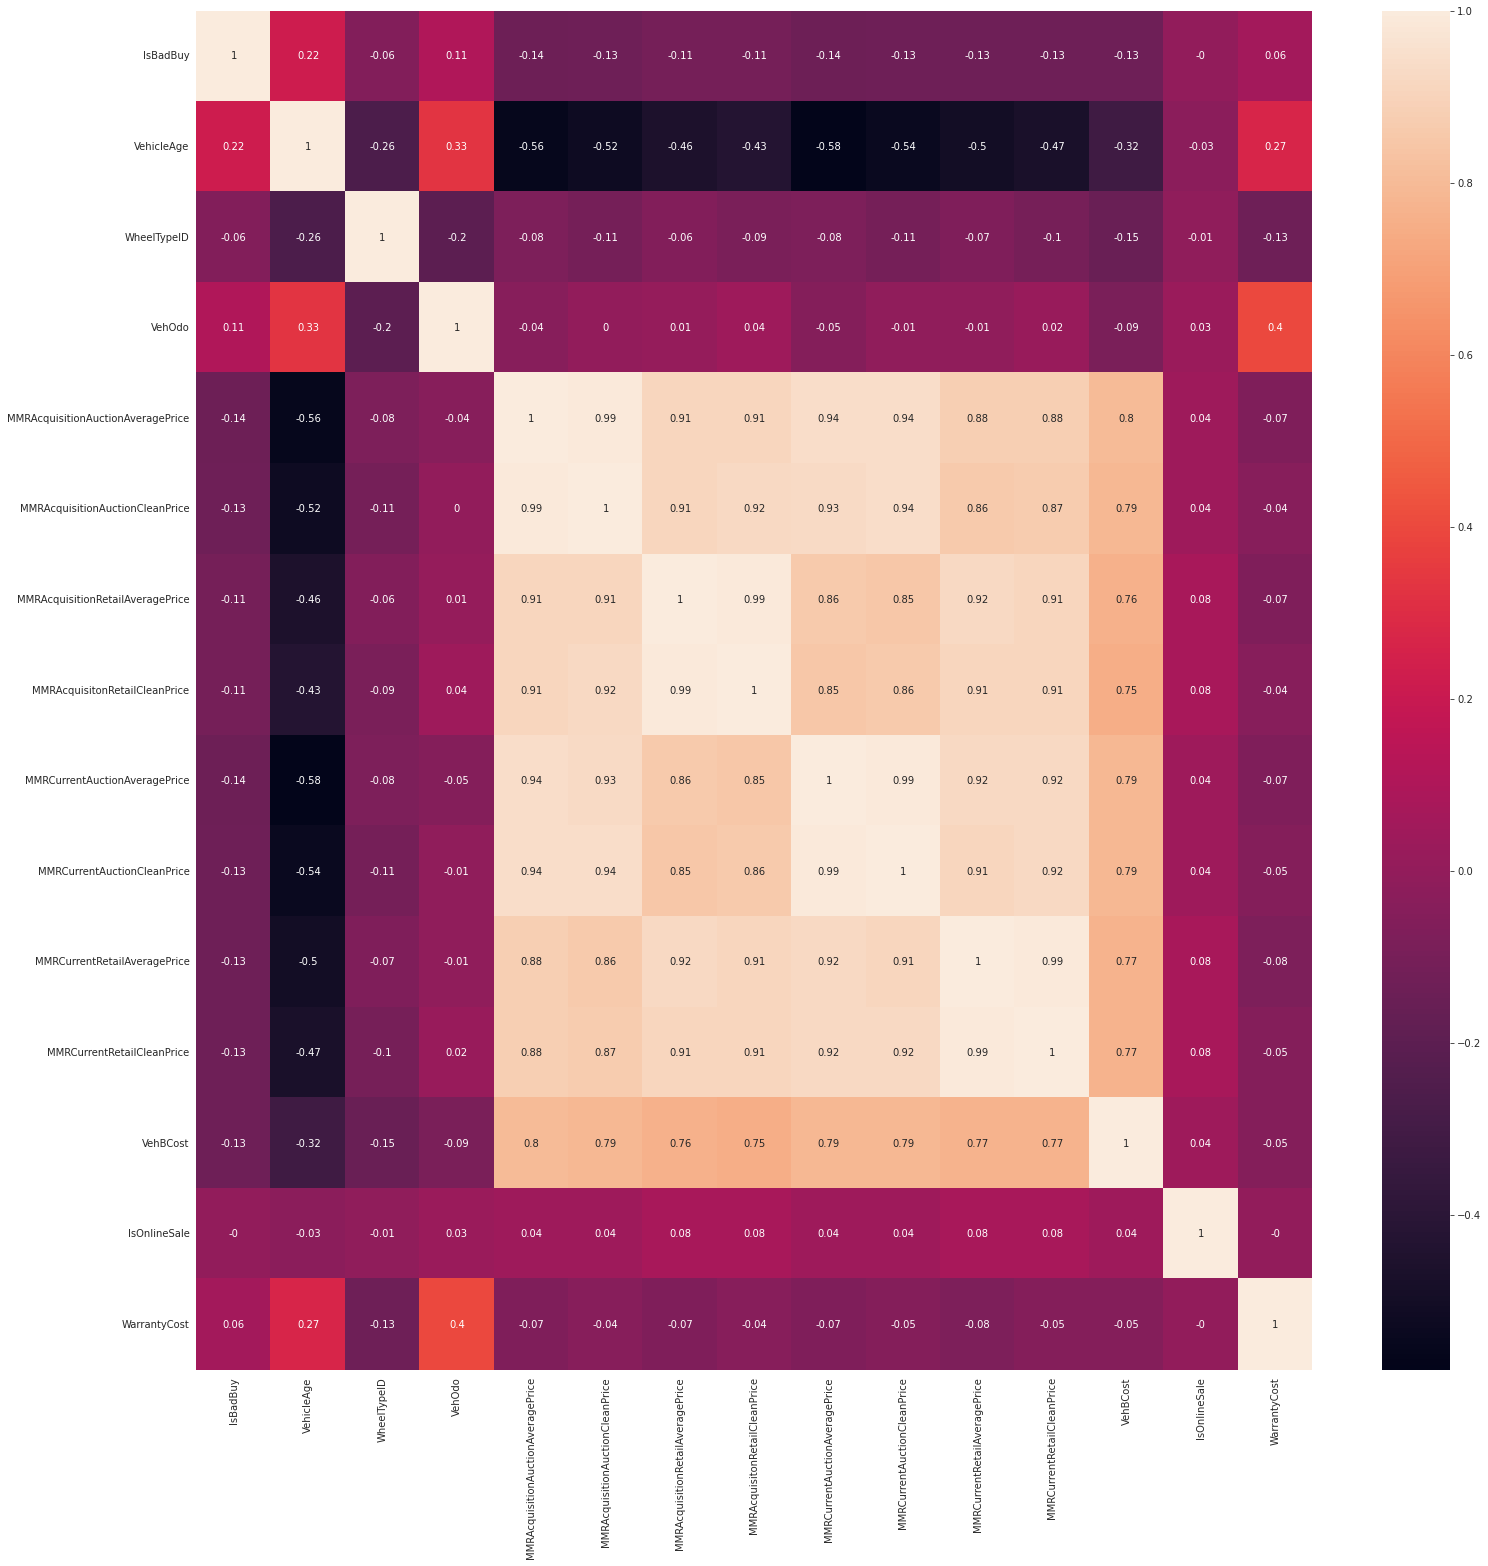

In [80]:
## remember "IsBadBuy" is our target.

plt.figure(figsize=(25,25))
correlation_matrix = train_df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

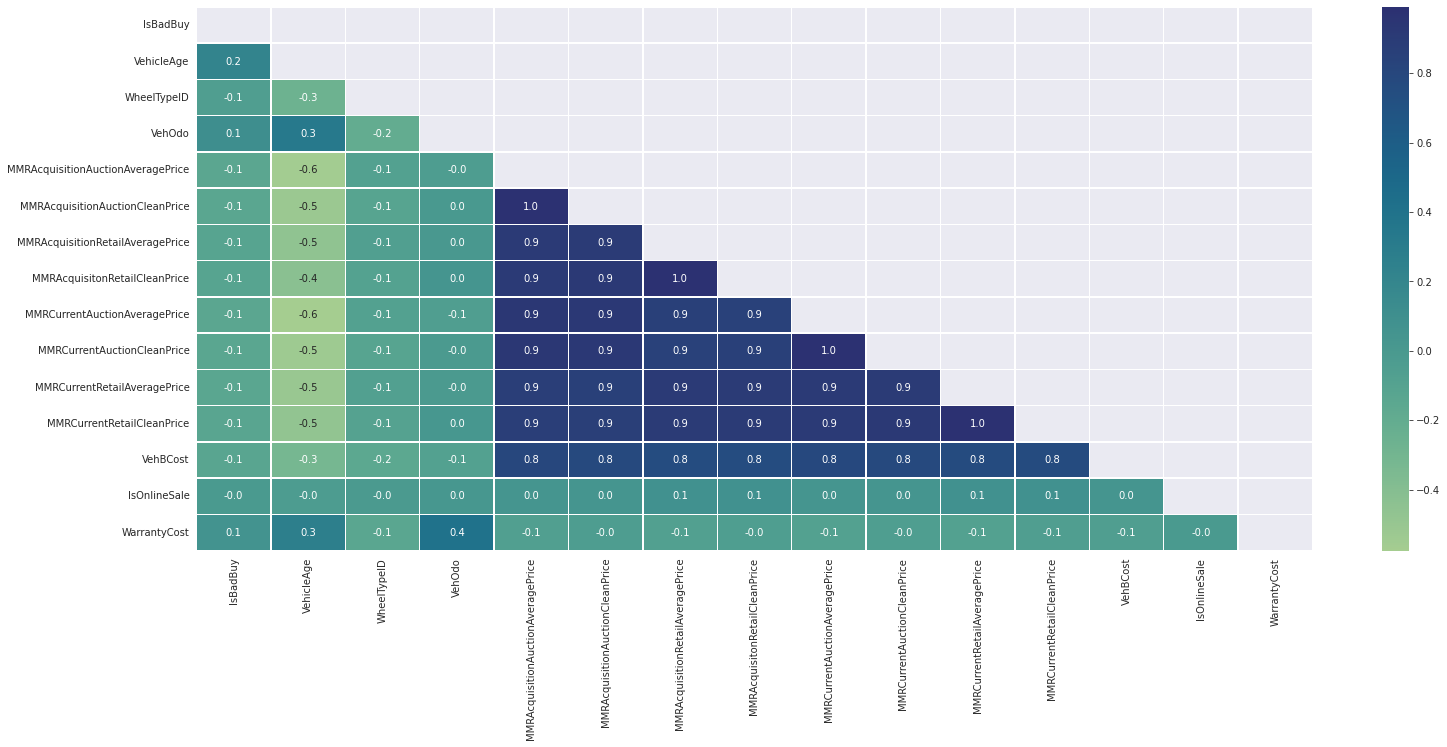

In [81]:
plt.figure(figsize=(25,10))
mask_matrix=np.triu(train_df.corr())
sns.heatmap(train_df.corr(),cmap='crest',annot=True, linewidths=.5, fmt= '.1f',mask=mask_matrix);
plt.show();

Probability of bad buys depending on country :- 
----------------------------------------------

AMERICAN	:  0.24502180921676464 
OTHER ASIAN	:  0.2681365576102418 
Top LINE ASIAN	:  0.25595238095238093 
OTHERS		:  0.2786885245901639


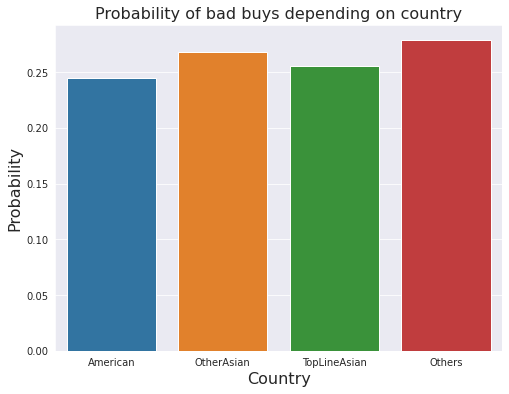

In [82]:
total=train_df.Nationality.value_counts()
american=train_df[(train_df.Nationality=='AMERICAN')&(train_df.IsBadBuy==1)].count()[1]
otherasian=train_df[(train_df.Nationality=='OTHER ASIAN')&(train_df.IsBadBuy==1)].count()[1]
topasian=train_df[(train_df.Nationality=='TOP LINE ASIAN')&(train_df.IsBadBuy==1)].count()[1]
other=train_df[(train_df.Nationality=='OTHER')&(train_df.IsBadBuy==1)].count()[1]
print("Probability of bad buys depending on country :- \n----------------------------------------------\n")
print("AMERICAN\t: ",american/total[0],
        "\nOTHER ASIAN\t: ",otherasian/total[1], 
        "\nTop LINE ASIAN\t: " ,topasian/total[2],
        "\nOTHERS\t\t: ",other/total[3])
x_titles=['American','OtherAsian','TopLineAsian','Others'];
y_titles=[american/total[0],otherasian/total[1],topasian/total[2],other/total[3]]
plt.figure(figsize=(8,6))
plt.title("Probability of bad buys depending on country",fontsize=16)
plt.ylabel('Probability',fontsize=16)
plt.xlabel('Country',fontsize=16)
sns.barplot(x=x_titles,y=y_titles);
plt.show()

### Analysis made:

* The given Dataset has Dataset alot of Yes for **`IsBadBuy`** column (alot of zeros denoting good buy)
* Maximum cars comming for resale is **3-4 yrs** old and is mostly considered a good buy compared to the ones which are **4-5 years** old
* **OTHER ASIAN** countries seem to dominate the probability of bad buys when segregated according to nationality (**OTHERS** only have few records -- hence, the propbability data is no representative.)
* Resale Cars from **America** can be bought as it has less chances of beeing a bad buy as compared to the other nationalities 
* **Ford** and **Chevrolet** cars have a high chance of being a bad buy

#Feature Engineering

In [83]:
print("Description about the columns of Dataset:-\n")
text_file = open('metaData.txt')
file_content = text_file.read()
print(file_content)
text_file.close()

Description about the columns of Dataset:-

IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 
VehicleAge				The Years elapsed since the manufacturer's year
Make					Vehicle Manufacturer 
Model					Vehicle Model
Trim					Vehicle Trim Level
SubModel				Vehicle Submodel
Color					Vehicle Color
Transmission				Vehicles transmission type (Automatic, Manual)
WheelTypeID				The type id of the vehicle wheel
WheelType				The vehicle wheel type description (Alloy, Covers)
VehOdo					The vehicles odometer reading
Nationality				The Manufacturer's country
Size					The size category of the vehicle (Compact, SUV, etc.)
MMRAcquisitionAuctionAveragePrice	Acquisition price for this vehicle in average condition at time of purchase	
MMRAcquisitionAuctionCleanPrice	Acquisition price for this vehicle in the above Average condition at time of purchase
MMRAcquisitionRetailAveragePrice	Acquisition price for this vehicle in the retail market in average condition at time of purchase
MMRAcq

1. **WheelTypeID and WheelType** seems weird... but still should keep.
2. Back to previous data ploting, we can drop one of the colinearity columns. -- we choose to drop all of XXX_AveragePrice as they have higher correlation toward VehicleAge (which is definitaly be selected for classifer model.)



In [84]:
train_df.drop(['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionRetailAveragePrice','MMRCurrentAuctionAveragePrice','MMRCurrentRetailAveragePrice'],axis=1,inplace=True)
test_df.drop(['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionRetailAveragePrice','MMRCurrentAuctionAveragePrice','MMRCurrentRetailAveragePrice'],axis=1,inplace=True)

3. We should handle the WheelType and WheelTypeID as they are representing same thing with string and numerical value, respectively.

In [85]:
train_df.WheelType.value_counts(dropna=False)

Alloy      12284
Covers     10922
NaN         1836
Special      268
Name: WheelType, dtype: int64

In [86]:
# [Idea #3] I should not give it numerical value as it implies a numerical rank.
# Hence, I want to use n colomns (instead) to denotes the WhellType information in a binary way.... 
train_df.WheelTypeID.value_counts(dropna=False)

1.0    12284
2.0    10922
NaN     1834
3.0      268
0.0        2
Name: WheelTypeID, dtype: int64

In [87]:
print("For Training Dataset:")
df=pd.DataFrame(train_df.isna().sum())
df.rename({0:'counts'},axis=1,inplace=True)
df[(df.counts>0)]

For Training Dataset:


,counts
Make,520
Trim,838
SubModel,1
Color,1
Transmission,1
WheelTypeID,1834
WheelType,1836
Nationality,1
Size,1
MMRAcquisitionAuctionCleanPrice,7


In [88]:
print("For Test Dataset:")
df=pd.DataFrame(test_df.isna().sum())
df.rename({0:'counts'},axis=1,inplace=True)
df[(df.counts>0)]

For Test Dataset:


,counts
Trim,401
SubModel,2
Color,2
Transmission,2
WheelTypeID,798
WheelType,798
MMRAcquisitionAuctionCleanPrice,2
MMRAcquisitonRetailCleanPrice,2
MMRCurrentAuctionCleanPrice,49
MMRCurrentRetailCleanPrice,49


In [89]:
for col in train_df:
   print(col," \t\t\t value_counts: \t",len(train_df[f'{col}'].value_counts()))

IsBadBuy  			 value_counts: 	 2
VehicleAge  			 value_counts: 	 9
Make  			 value_counts: 	 17
Model  			 value_counts: 	 898
Trim  			 value_counts: 	 124
SubModel  			 value_counts: 	 693
Color  			 value_counts: 	 16
Transmission  			 value_counts: 	 3
WheelTypeID  			 value_counts: 	 4
WheelType  			 value_counts: 	 3
VehOdo  			 value_counts: 	 19923
Nationality  			 value_counts: 	 4
Size  			 value_counts: 	 12
MMRAcquisitionAuctionCleanPrice  			 value_counts: 	 8752
MMRAcquisitonRetailCleanPrice  			 value_counts: 	 9947
MMRCurrentAuctionCleanPrice  			 value_counts: 	 8583
MMRCurrentRetailCleanPrice  			 value_counts: 	 9660
VehBCost  			 value_counts: 	 1843
IsOnlineSale  			 value_counts: 	 2
WarrantyCost  			 value_counts: 	 263


In [90]:
print("Model.value_counts:",len(train_df.Model.value_counts(dropna=False)))
print("Make.value_counts:",len(train_df.Make.value_counts(dropna=False)))
print("SubModel.value_counts:",len(train_df.SubModel.value_counts(dropna=False)))
print("Color.value_counts:",len(train_df.Color.value_counts(dropna=False)))
print("WheelType.value_counts:",len(train_df.WheelType.value_counts(dropna=False)))
print("WheelTypeID.value_counts:",len(train_df.WheelTypeID.value_counts(dropna=False)))
print("Trim.value_counts:",len(train_df.Trim.value_counts(dropna=False)))
print("Nationality.value_counts:",len(train_df.Nationality.value_counts(dropna=False)))
print("Transmission.value_counts:",len(train_df.Transmission.value_counts(dropna=False)))
print("Size.value_counts:",len(train_df.Size.value_counts(dropna=False)))
print("IsOnlineSale.value_counts:",len(train_df.IsOnlineSale.value_counts(dropna=False)))

Model.value_counts: 898
Make.value_counts: 18
SubModel.value_counts: 694
Color.value_counts: 17
WheelType.value_counts: 4
WheelTypeID.value_counts: 5
Trim.value_counts: 125
Nationality.value_counts: 5
Transmission.value_counts: 4
Size.value_counts: 13
IsOnlineSale.value_counts: 2


In [91]:
train_df.Transmission.value_counts(dropna=False)
train_df["Transmission"].replace("Manual","MANUAL",inplace=True)
train_df.Transmission.value_counts(dropna=False)

AUTO      24402
MANUAL      907
NaN           1
Name: Transmission, dtype: int64

In [92]:
train_df.Nationality.value_counts(dropna=False)

AMERICAN          21092
OTHER ASIAN        2812
TOP LINE ASIAN     1344
OTHER                61
NaN                   1
Name: Nationality, dtype: int64

In [93]:
train_df.Size.value_counts(dropna=False)

MEDIUM         10578
LARGE           2964
MEDIUM SUV      2873
COMPACT         2600
VAN             2009
LARGE TRUCK     1092
SMALL SUV        806
SPECIALTY        654
CROSSOVER        608
LARGE SUV        536
SMALL TRUCK      298
SPORTS           291
NaN                1
Name: Size, dtype: int64

In [94]:
px.histogram(train_df, x = "Size", color = "IsBadBuy",height=500,width=800)

In [95]:
print(train_df.Model.value_counts().keys())

Index(['PT CRUISER', 'IMPALA', 'TAURUS', 'CALIBER', 'CARAVAN GRAND FWD V6',
       'TAURUS 3.0L V6 EFI', 'PT CRUISER 2.4L I4 S', 'COBALT', 'MALIBU 4C',
       '1500 RAM PICKUP 2WD',
       ...
       'S60', 'TRACKER 4WD V6', 'LS V6', 'COMPASS 4WD 4C 2.4L',
       'SX4 2.0L I4 EFI', 'DURANGO 4WD V8 MFI V', 'RX300 2WD',
       'MATRIX 2WD Multiple', 'NAVIGATOR 4WD V8', 'CHEROKEE 2WD 6C 4.0L'],
      dtype='object', length=898)


In [96]:
threshold = 200 # Anything that occurs less than this will be removed.
value_counts = train_df.Model.value_counts() # Specific column 
to_remove = value_counts[value_counts <= threshold].index
train_df.Model.replace(to_remove, np.nan, inplace=True)

print(train_df.Model.value_counts().keys())

Index(['PT CRUISER', 'IMPALA', 'TAURUS', 'CALIBER', 'CARAVAN GRAND FWD V6',
       'TAURUS 3.0L V6 EFI', 'PT CRUISER 2.4L I4 S', 'COBALT', 'MALIBU 4C',
       '1500 RAM PICKUP 2WD', 'SEBRING 4C', 'FOCUS', 'IMPALA V6',
       'STRATUS V6 2.7L V6 M', 'GRAND PRIX', 'IMPALA 3.5L V6 SFI',
       'GRAND PRIX 3.8L V6 S', 'MALIBU 4C 2.2L I4 MP', 'ION', 'ALTIMA',
       'FORENZA', 'SPECTRA', '1500 SILVERADO PICKU', 'MALIBU V6',
       'AVENGER 4C'],
      dtype='object')


In [97]:
train_df.Model.value_counts(dropna=False)

NaN                     16460
PT CRUISER                853
IMPALA                    645
TAURUS                    508
CALIBER                   469
CARAVAN GRAND FWD V6      412
TAURUS 3.0L V6 EFI        399
PT CRUISER 2.4L I4 S      393
COBALT                    387
MALIBU 4C                 380
1500 RAM PICKUP 2WD       364
SEBRING 4C                362
FOCUS                     350
IMPALA V6                 328
STRATUS V6 2.7L V6 M      317
GRAND PRIX                308
IMPALA 3.5L V6 SFI        269
GRAND PRIX 3.8L V6 S      264
MALIBU 4C 2.2L I4 MP      255
ION                       249
ALTIMA                    247
FORENZA                   237
SPECTRA                   227
1500 SILVERADO PICKU      213
MALIBU V6                 209
AVENGER 4C                205
Name: Model, dtype: int64

### Conclusions ------- Will change!!!!


1. We can drop **`Model`**, **`Trim`** and **`SubModel`** as they have alot of categories **and model wont be able to learn all of them**.


2. Note: **`WheelType`** and **`WheelTypeID`** are one and the same. One of them is containing numeric categories and other as string. Its better we drop **`WheelTypeID`** as the other column has type of metal used for making the wheel which might help us understand the importance of a particular metal used in making the wheel

3.  **`VehYear`** might not play a crucial role as we have  **`VehicleAge`** as a column. The  **`PurchDate`** varies and similarly  **`VehYear`** varies.The only thing that matters is how much old the vehicle is at the time of resale. Thus `drop` **`VehYear`**

4. State from which car is bought should nit be a factor for judging bad buy . Thus we can drop **`VNST`** .


In [98]:
train_df.drop(['Model','Trim','SubModel','WheelTypeID'],axis=1,inplace=True)
test_df.drop(['Model','Trim','SubModel','WheelTypeID'],axis=1,inplace=True)

In [99]:
train_df.sample(5)

,IsBadBuy,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,MMRAcquisitionAuctionCleanPrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
17812,0,2,DODGE,SILVER,AUTO,Covers,71448,AMERICAN,SPECIALTY,11839.0,15931.0,11305.0,14993.0,10500.0,0,1389
3273,0,3,CHRYSLER,BLACK,AUTO,Covers,66444,AMERICAN,MEDIUM,8176.0,11655.0,7536.0,11150.0,7785.0,0,1020
15586,0,3,CHEVROLET,WHITE,AUTO,Covers,91557,AMERICAN,MEDIUM,8464.0,12070.0,8495.0,12109.0,5600.0,0,1197
23887,0,6,NaN,SILVER,AUTO,Alloy,65947,AMERICAN,MEDIUM,4376.0,5226.0,5233.0,6152.0,4985.0,0,1613
12961,1,9,TOYOTA,SILVER,AUTO,Covers,90941,TOP LINE ASIAN,SMALL SUV,6691.0,9234.0,6109.0,9141.0,6620.0,0,920


In [100]:
df=pd.DataFrame(train_df.isna().sum())
df.rename({0:'counts'},axis=1,inplace=True)
df[(df.counts>0)]

,counts
Make,520
Color,1
Transmission,1
WheelType,1836
Nationality,1
Size,1
MMRAcquisitionAuctionCleanPrice,7
MMRAcquisitonRetailCleanPrice,7
MMRCurrentAuctionCleanPrice,108
MMRCurrentRetailCleanPrice,108


In [102]:
# Define in which columns to look for missing values.
train_df = train_df.dropna(subset=[ 'Color', 'Transmission', 'Nationality', 'Size']);
# train_df = train_df.dropna(thresh=2)
test_df = test_df.dropna(subset=['Color', 'Transmission', 'Nationality', 'Size']);
# test_df = test_df.dropna(thresh=2)

In [103]:
df=pd.DataFrame(train_df.isna().sum())
df.rename({0:'counts'},axis=1,inplace=True)
df[(df.counts>0)]

,counts
Make,520
WheelType,1835
MMRAcquisitionAuctionCleanPrice,7
MMRAcquisitonRetailCleanPrice,7
MMRCurrentAuctionCleanPrice,108
MMRCurrentRetailCleanPrice,108


# Data Cleaning


In [104]:
targets=train_df['IsBadBuy']
train_df.drop('IsBadBuy',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
# test_df = test_df.dropna(thresh=2)
# train_df = train_df.dropna(thresh=2)

In [106]:
train_df.sample(5)

,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,MMRAcquisitionAuctionCleanPrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
10202,3,CHEVROLET,BLACK,AUTO,Covers,57277,AMERICAN,MEDIUM,7072.0,8138.0,7687.0,11896.0,6925.0,0,837
658,3,CHEVROLET,SILVER,AUTO,Covers,74966,AMERICAN,LARGE,9194.0,12771.0,8642.0,11695.0,8080.0,0,1974
12009,6,PONTIAC,GREY,AUTO,Alloy,74938,AMERICAN,VAN,4661.0,5534.0,4364.0,5213.0,5400.0,0,4922
17096,6,FORD,BLACK,AUTO,Covers,88839,AMERICAN,SMALL SUV,6745.0,10617.0,7119.0,10660.0,5770.0,0,983
24047,2,PONTIAC,WHITE,AUTO,Alloy,51181,AMERICAN,LARGE,9638.0,10909.0,8906.0,10118.0,6990.0,0,1500


In [107]:
categorical_cols = train_df.select_dtypes(include = 'object').columns.tolist()
numeric_cols = train_df.select_dtypes(exclude='object').columns.tolist()

In [108]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean');
imputer.fit(train_df[numeric_cols]);
train_df[numeric_cols]=imputer.transform(train_df[numeric_cols]);
test_df[numeric_cols]=imputer.transform(test_df[numeric_cols]);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
# threshold = 200 # Anything that occurs less than this will be removed.
# value_counts = train_df.Make.value_counts() # Specific column 
# to_remove = value_counts[value_counts <= threshold].index
# train_df.Make.replace(to_remove, np.nan, inplace=True)

# print(train_df.Make.value_counts().keys())
# # px.histogram(train_df, x = "Make", color = "IsBadBuy",height=500,width=800)

In [110]:
# px.histogram(train_df, x = "Make", color = "IsBadBuy",height=500,width=800)

In [111]:
# train_df.Trim.value_counts()

In [112]:
train_df.sample(5)

,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,MMRAcquisitionAuctionCleanPrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
2921,8.0,DODGE,MAROON,AUTO,Alloy,87788.0,AMERICAN,LARGE TRUCK,6558.0,10216.0,6875.0,10046.0,9110.0,0.0,1283.0
4472,5.0,CHEVROLET,WHITE,AUTO,Covers,87079.0,AMERICAN,MEDIUM SUV,7713.0,11156.0,8038.0,13362.0,7700.0,0.0,1503.0
17414,6.0,JEEP,SILVER,AUTO,Covers,63334.0,AMERICAN,SMALL SUV,7580.0,10940.0,7440.0,10902.0,7150.0,0.0,825.0
23578,3.0,DODGE,GREY,AUTO,Alloy,62141.0,AMERICAN,SPECIALTY,8740.0,9939.0,8740.0,9939.0,8535.0,0.0,1215.0
8383,4.0,FORD,GREY,AUTO,Covers,55441.0,AMERICAN,COMPACT,4725.0,5603.0,5167.0,6080.0,4690.0,0.0,920.0


In [113]:
# Due to different versions of libraries OneHotEncoder is not working efficiently (i.e not able to deal with NaN values)
train_df.Make.fillna('Make_unk',inplace=True)
test_df.Make.fillna('Make_unk',inplace=True)

train_df.Transmission.fillna('Trans_unk',inplace=True)
train_df.WheelType.fillna('WheelType_unk',inplace=True)
train_df.Nationality.fillna('Nationality_unk',inplace=True)
train_df.Size.fillna('Trans_unk',inplace=True)
train_df.Color.fillna('Color_unk',inplace=True)

test_df.Size.fillna('Trans_unk',inplace=True)
test_df.WheelType.fillna('Trans_unk',inplace=True)
test_df.Nationality.fillna('Trans_unk',inplace=True)
test_df.Transmission.fillna('Trans_unk',inplace=True)
test_df.Color.fillna('Color_unk',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [114]:
# train_df.drop('IsBadBuy',axis=1,inplace=True)

In [115]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(train_df[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
train_df[encoded_cols]=encoder.transform(train_df[categorical_cols]);
test_df[encoded_cols]=encoder.transform(test_df[categorical_cols]);
# get_feature_names_out

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_df[numeric_cols]);
train_df[numeric_cols]=scaler.transform(train_df[numeric_cols])
test_df[numeric_cols]=scaler.transform(test_df[numeric_cols])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
train_df=train_df[numeric_cols+encoded_cols]
test_df=test_df[numeric_cols+encoded_cols]

In [118]:
from sklearn.model_selection import train_test_split
inputs,val_inputs,targets,val_targets = train_test_split(train_df,targets,test_size=0.25, random_state=42)

# DUMB MODEL

In [119]:
from sklearn.metrics import accuracy_score, confusion_matrix
# A Dum model saying "NO" always has a accuracy of 87% . So we need to have a percentage above it !!!!!!!!
dum_model_outs=np.zeros(len(inputs))
accuracy_score(dum_model_outs,targets)

0.7483272746430641

In [120]:
train_df.isnull().sum()

VehicleAge                         0
VehOdo                             0
MMRAcquisitionAuctionCleanPrice    0
MMRAcquisitonRetailCleanPrice      0
MMRCurrentAuctionCleanPrice        0
                                  ..
Size_SMALL SUV                     0
Size_SMALL TRUCK                   0
Size_SPECIALTY                     0
Size_SPORTS                        0
Size_VAN                           0
Length: 65, dtype: int64

In [121]:
# train_df.info()

In [122]:
# ## remember "IsBadBuy" is our target.

# plt.figure(figsize=(250,250))
# correlation_matrix = train_df.corr().round(2)
# # annot = True to print the values inside the square
# sns.heatmap(data=correlation_matrix, annot=True)

# Model-1 : DecisionTreeClassifier

In [123]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
model=DecisionTreeClassifier(max_depth=12,random_state=42)
model.fit(inputs,targets)
print("Train_acc:",model.score(inputs,targets)," | Val_acc:",model.score(val_inputs,val_targets))

Train_acc: 0.8457404773194247  | Val_acc: 0.7897897897897898
CPU times: user 246 ms, sys: 0 ns, total: 246 ms
Wall time: 245 ms


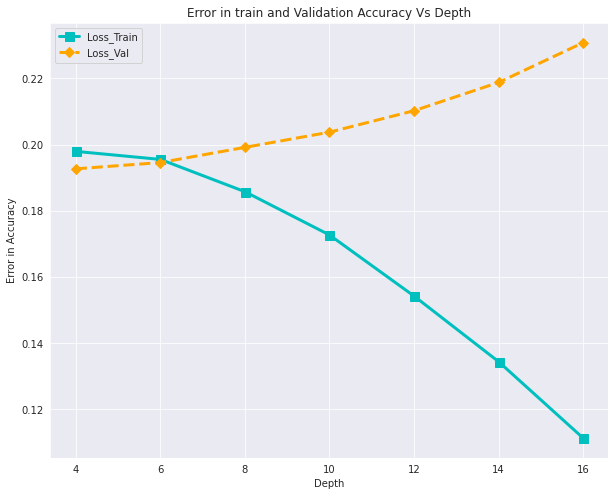

In [124]:
def max_depth(min,max):
    depth=[]
    tr_ac=[]
    va_ac=[]
    for i in range(min,max,2):
        model =DecisionTreeClassifier(max_depth=i, random_state=42)
        model.fit(inputs,targets)
        depth.append(i)
        tr_ac.append(model.score(inputs,targets))
        va_ac.append(model.score(val_inputs,val_targets))
        
    tr_ac=1-np.array(tr_ac);
    va_ac=1-np.array(va_ac);
    
    plt.figure(figsize=(10,8))
    sns.set_style('darkgrid')
    plt.title('Error in train and Validation Accuracy Vs Depth')
    plt.xlabel('Depth')
    plt.ylabel('Error in Accuracy')
    plt.plot(depth,tr_ac,'cs-',linewidth=3,markersize=9)
    plt.plot(depth,va_ac,'D--',color='orange',linewidth=3, markersize=7)
    plt.legend(['Loss_Train','Loss_Val']);
    plt.show()
max_depth(4,18)

In [125]:
model=DecisionTreeClassifier(max_depth=6,random_state=42,max_features=0.9,class_weight={0:1,1:2})
model.fit(inputs,targets)
print("Train_acc:",model.score(inputs,targets)," | Val_acc:",model.score(val_inputs,val_targets))

Train_acc: 0.7802539381486749  | Val_acc: 0.7804646752015173


In [126]:
# preds=model.predict(test_df)
# submissions_df['IsBadBuy']=preds
# submissions_df.to_csv('Submissions.csv',index=False)

#Model-2 :- Random Forest Classifier



In [127]:
from sklearn.ensemble import RandomForestClassifier    

In [128]:
%%time
model=RandomForestClassifier(n_jobs=-1,n_estimators=12,max_depth=16,random_state=42)
model.fit(inputs,targets)
print("Train_acc:",model.score(inputs,targets)," | Val_acc:",model.score(val_inputs,val_targets))

Train_acc: 0.8750329276645066  | Val_acc: 0.8013276434329066
CPU times: user 481 ms, sys: 36.4 ms, total: 518 ms
Wall time: 339 ms


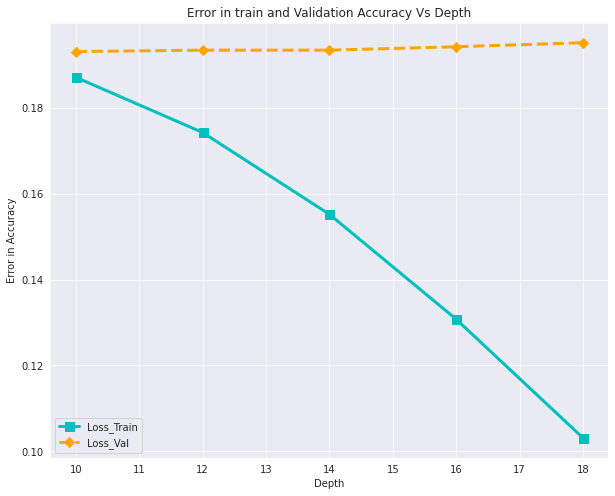

In [129]:
def max_depth(min,max):
    depth=[]
    tr_ac=[]
    va_ac=[]
    for i in range(min,max,2):
        model =RandomForestClassifier(max_depth=i, random_state=42)
        model.fit(inputs,targets)
        depth.append(i)
        tr_ac.append(model.score(inputs,targets))
        va_ac.append(model.score(val_inputs,val_targets))
        
    tr_ac=1-np.array(tr_ac);
    va_ac=1-np.array(va_ac);
    
    plt.figure(figsize=(10,8))
    sns.set_style('darkgrid')
    plt.title('Error in train and Validation Accuracy Vs Depth')
    plt.xlabel('Depth')
    plt.ylabel('Error in Accuracy')
    plt.plot(depth,tr_ac,'cs-',linewidth=3,markersize=9)
    plt.plot(depth,va_ac,'D--',color='orange',linewidth=3, markersize=7)
    plt.legend(['Loss_Train','Loss_Val']);
    plt.show()
max_depth(10,20)

In [130]:
def test_model(**params):
        model=RandomForestClassifier(n_jobs=-1,random_state=42,**params)
        model.fit(inputs,targets)
        print(" | Train_acc: ",model.score(inputs,targets)," | Val_acc: ",model.score(val_inputs,val_targets) ) 
        return model.score(inputs,targets),model.score(val_inputs,val_targets)

In [131]:
test_model(n_estimators=12)
test_model(n_estimators=100)

 | Train_acc:  0.9853010905642484  | Val_acc:  0.7964280069543227
 | Train_acc:  1.0  | Val_acc:  0.802275960170697


(1.0, 0.802275960170697)

In [132]:
%%time
model=RandomForestClassifier(n_jobs=-1,n_estimators=100,max_depth=16,random_state=42)
model.fit(inputs,targets)
print("Train_acc:",model.score(inputs,targets)," | Val_acc:",model.score(val_inputs,val_targets))

Train_acc: 0.869237658711343  | Val_acc: 0.8057531215425953
CPU times: user 4.37 s, sys: 418 ms, total: 4.79 s
Wall time: 788 ms


In [133]:
importance_df = pd.DataFrame({
    'feature': inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
48,WheelType_WheelType_unk,0.188943
6,VehBCost,0.080541
2,MMRAcquisitionAuctionCleanPrice,0.078364
4,MMRCurrentAuctionCleanPrice,0.078020
1,VehOdo,0.074812
5,MMRCurrentRetailCleanPrice,0.071906
3,MMRAcquisitonRetailCleanPrice,0.068707
0,VehicleAge,0.054181
8,WarrantyCost,0.052220
45,WheelType_Alloy,0.036182


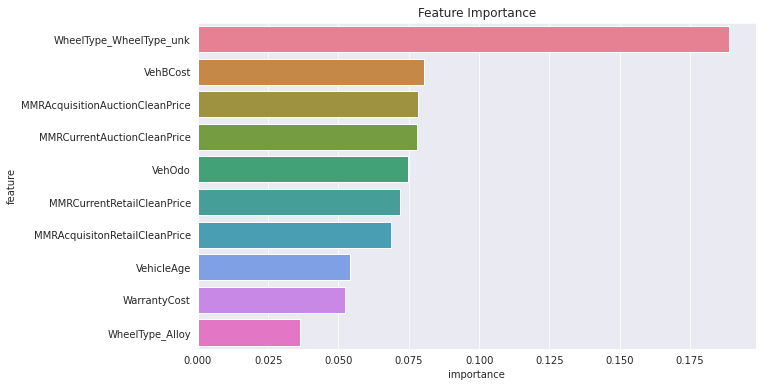

In [134]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),palette='husl',x='importance', y='feature');
plt.show()

In [135]:
# preds=model.predict_proba(test_df)
# submissions_df['IsBadBuy']=preds[:,1]
# submissions_df.to_csv('Submissions.csv',index=False)

## Summary

> **[Idea #4] I should seperate "WheelType unk" into WheelType_Alloy and .. other matrial based on the ratio!!!!!!!**

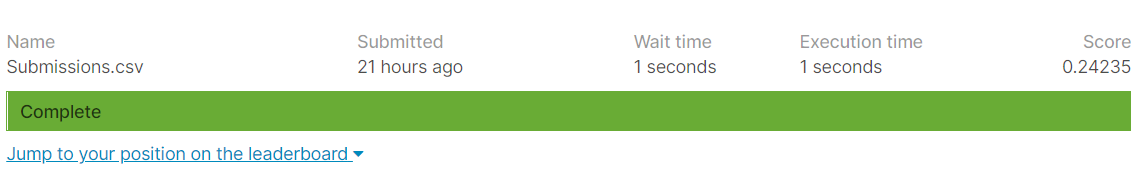

# Conclusion
I took my inspriation from the following notebooks:-

* https://www.kaggle.com/mikhailtokar/ml-rgr-dgk
* https://www.kaggle.com/yogesh893/dont-get-kicked
* https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/random-forests-and-regularization
* https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/gradient-boosting-with-xgboost